<font size ="6"> **Linear Regression for Szeged Weather** </font>

## **Importing the libraries and dataset** 

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [88]:
dataset = pd.read_csv("weatherHistory.csv")
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [90]:
dataset.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [91]:
dataset.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [92]:
dataset.columns = dataset.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

## **Data Preprocessing**

In [93]:
dataset['precip_type'] = dataset.precip_type.astype(str)
dataset['precip_type'] = dataset['precip_type'].replace(np.nan,0)
dataset = dataset.drop(['loud_cover'],axis=1)

import datetime
# dataset['date'] = pd.to_datetime(datset['formatted_date'])
dataset['month'] = pd.to_datetime(dataset['formatted_date'],utc=True).dt.month
del dataset['daily_summary']
del dataset['formatted_date']
# del dataset['temperature_c']

In [94]:
dataset.isnull().sum()

summary                   0
precip_type               0
temperature_c             0
apparent_temperature_c    0
humidity                  0
wind_speed_km/h           0
wind_bearing_degrees      0
visibility_km             0
pressure_millibars        0
month                     0
dtype: int64

In [95]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['summary'] = label_encoder.fit_transform(dataset['summary'])
dataset['summary'].unique()

array([19, 17, 18, 12,  3,  6,  5,  4, 13, 15, 23, 25,  2, 26,  0, 11, 24,
        7,  9, 21, 14, 16,  8, 22, 10,  1, 20])

In [96]:
dataset['precip_type'] = label_encoder.fit_transform(dataset['precip_type'])
dataset['precip_type'].unique()

array([1, 2, 0])

## **Data Insight**

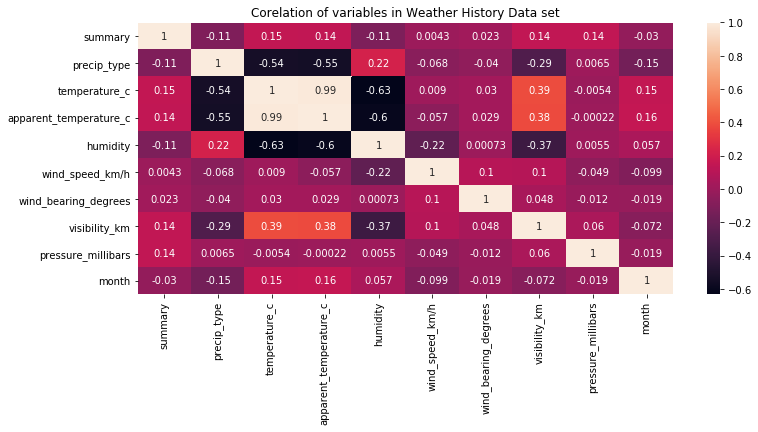

In [97]:
corr_data = dataset.corr();
plt.figure(figsize=(12,5))
sns.heatmap(corr_data, annot=True)
plt.title("Corelation of variables in Weather History Data set")
plt.show()

<Figure size 720x288 with 0 Axes>

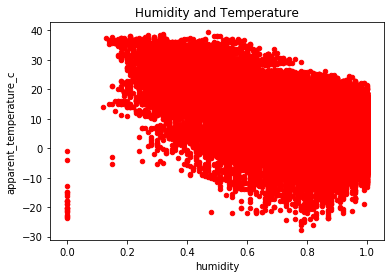

In [98]:
plt.figure(figsize=(10,4))
dataset.plot(kind='scatter',x='humidity',y='apparent_temperature_c',color='red')
plt.title("Humidity and Temperature")
plt.show()

In [99]:
dataset

,summary,precip_type,temperature_c,apparent_temperature_c,humidity,wind_speed_km/h,wind_bearing_degrees,visibility_km,pressure_millibars,month
0,19,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,3
1,19,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,3
2,17,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4
3,19,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,4
4,17,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,4
...,...,...,...,...,...,...,...,...,...,...
96448,19,1,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,9
96449,19,1,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,9
96450,19,1,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,9
96451,19,1,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,9


## **Scaling**

In [100]:
def normalize(dataset):
    dataNorm = ((dataset-dataset.min())/(dataset.max()-dataset.min()))
    return dataNorm

In [101]:
dataset=normalize(dataset)

In [102]:
dataset

,summary,precip_type,temperature_c,apparent_temperature_c,humidity,wind_speed_km/h,wind_bearing_degrees,visibility_km,pressure_millibars,month
0,0.730769,0.5,0.506975,0.523486,0.89,0.221130,0.699164,0.983,0.970135,0.181818
1,0.730769,0.5,0.505085,0.521084,0.86,0.223399,0.721448,0.983,0.970613,0.181818
2,0.653846,0.5,0.505445,0.553144,0.89,0.061523,0.568245,0.929,0.970909,0.272727
3,0.730769,0.5,0.487805,0.501947,0.83,0.220877,0.749304,0.983,0.971358,0.272727
4,0.653846,0.5,0.495365,0.517356,0.83,0.172970,0.721448,0.983,0.971454,0.272727
...,...,...,...,...,...,...,...,...,...,...
96448,0.730769,0.5,0.774998,0.801259,0.43,0.172214,0.086351,1.000,0.969399,0.727273
96449,0.730769,0.5,0.751778,0.779886,0.48,0.158094,0.055710,0.966,0.970164,0.727273
96450,0.730769,0.5,0.710557,0.741944,0.56,0.140696,0.083565,1.000,0.970642,0.727273
96451,0.730769,0.5,0.702187,0.734239,0.60,0.164902,0.055710,1.000,0.970919,0.727273


## **Splitting the dataset**

In [103]:
result = dataset['apparent_temperature_c']
del dataset['apparent_temperature_c'] 

In [104]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dataset,result,test_size=0.2,random_state=30)

## **Training and prediction**

In [105]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train,y_train)

result_predict = lreg.predict(X_test)

from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
print("accuracy train : {}".format(lreg.score(X_train,y_train)))
print("accuracy test : {}".format(lreg.score(X_test,y_test)))
print("rms error : {}".format(np.sqrt(mean_squared_error(y_test,result_predict))))
print("r2 score : {}".format(r2_score(y_test,result_predict)))

accuracy train : 0.9899615491541631
accuracy test : 0.9899896125012179
rms error : 0.015953100326121492
r2 score : 0.9899896125012179


0.7493770686661746


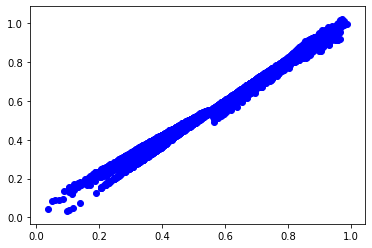

In [106]:
print(result_predict[3])
plt.scatter(y_test,result_predict,color='blue')